In [8]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

(4, 10)

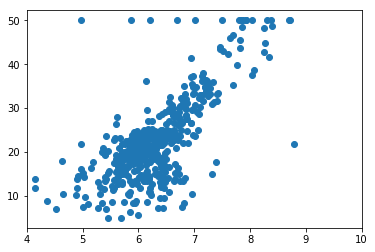

In [9]:
data = load_boston()
x,y = data['data'],data['target']
plt.scatter(x[:,5],y)
plt.xlim(4,10)

In [10]:
import random
def price(rm,k,b):
    return k *rm + b

(4, 9)

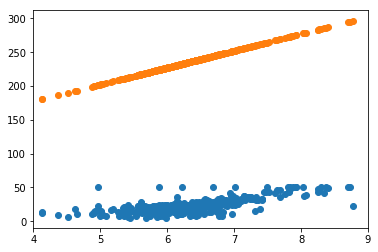

In [11]:
k = random.randint(-100,100)
b = random.randint(-100,100)
X_rm = x[:,5]  #复习numpy的用法
price_kb = [price(rm,k,b) for rm in X_rm]
plt.scatter(x[:,5],y)
plt.scatter(X_rm,price_kb)
plt.xlim(4,9)

In [12]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

In [13]:
X_rm = x[:,5]
#这句是什么意思
min_loss = float('inf')
current_k,current_b = None,None

for i in range(10000):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    current_loss = loss(y,price_kb)
    price_kb = [price(r,k,b) for r in X_rm]
    
    if current_loss < min_loss:
        current_k,current_b = k,b 
        min_loss = current_loss
        print('current_k:{},current_b:{},min_loss:{}'.format(current_k,current_b,min_loss))
        

current_k:99,current_b:-100,min_loss:44935.51425765811
current_k:96,current_b:-29,min_loss:12610.539807905132
current_k:72,current_b:62,min_loss:85.52429081422922
current_k:13,current_b:-5,min_loss:59.00452796837945
current_k:-5,current_b:-9,min_loss:47.49091147628458
current_k:80,current_b:-48,min_loss:44.26439962055332


# 方法2-Direction

In [14]:
trying_times = 10000
loss_min = float('inf')
best_k,best_b = None,None
direction = [
        (+1,-1),
        (+1,+1),
        (-1,+1),
        (-1,-1),
    ]
next_direction = random.choice(direction)
for i in range(trying_times):
    k = random.random()*200-100
    b = random.random()*200-100
    k_direciton,b_direction = next_direction
    current_k,current_b = k + k_direciton,b + b_direction
    price_k_b = [price(r,current_k,current_b) for r in X_rm]
    current_loss = loss(y,price_k_b)

    if current_loss < loss_min:
        loss_min = current_loss
        best_k,best_b = current_k,current_b
        next_direction = next_direction
        print('current_k:{},current_b:{},min_loss:{}'.format(best_k,best_b,loss_min))
    else:
        next_direction = random.choice(direction)

current_k:-57.582129525601864,current_b:29.717549473122915,min_loss:128045.10342995157
current_k:28.583903142190593,current_b:-89.2945211519053,min_loss:4829.072794285342
current_k:2.3401344794973937,current_b:-17.34438107922513,min_loss:699.6725856865388
current_k:3.9713833189356365,current_b:-1.285972670553008,min_loss:57.86983307584023
current_k:4.612593518151925,current_b:-8.26381109401683,min_loss:56.80061229220776
current_k:8.857395507507974,current_b:-31.00437279747021,min_loss:48.15977403226809
current_k:7.739022344385148,current_b:-25.22030917464201,min_loss:45.29710294835477
current_k:9.413833210943608,current_b:-36.5445995869577,min_loss:43.6556689378399


# 使用导数方法，对k和b的变化趋势进行监管

In [15]:
def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) *x_i
    return -2 / n * gradient

In [16]:
def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) 
    return -2 / n * gradient

current_k:-26.500726751357774,current_b:-77.35812348535956,min_loss:71657.49444688976
current_k:-21.15621051426575,current_b:47.40092912226862,min_loss:12178.343623581355
current_k:-0.07426439740329727,current_b:-25.311488741735545,min_loss:2419.0429803556362
current_k:-5.75666420255871,current_b:21.21997987578976,min_loss:1557.9811425365945
current_k:13.280582848985702,current_b:-30.90076362137006,min_loss:954.005999722104
current_k:11.67355359722471,current_b:-77.453007092099,min_loss:755.5784923725507
current_k:9.549579662449716,current_b:-28.06938467352893,min_loss:132.31178818428722
current_k:2.594553002152878,current_b:3.9291523293257598,min_loss:69.74540388921801
current_k:5.031440249142435,current_b:-6.572248360733795,min_loss:58.093466299795736
current_k:7.407485530003427,current_b:-20.78400058014141,min_loss:55.490583971559346
current_k:13.432292120190525,current_b:-62.89317218734936,min_loss:53.85677344429815
current_k:9.55902466782419,current_b:-38.429180695086,min_loss:44.

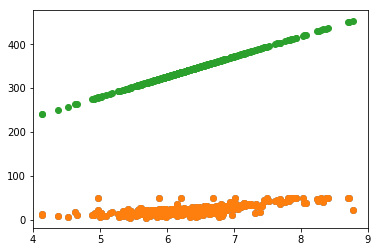

In [17]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random

data = load_boston()
x,y = data['data'],data['target']
plt.scatter(x[:,5],y)
plt.xlim(4,10)

def price(rm,k,b):
    return k *rm + b
X_rm = x[:,5]  #复习numpy的用法

plt.scatter(x[:,5],y)
plt.scatter(X_rm,price_kb)
plt.xlim(4,9)

def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

trying_times = 10000
loss_min = float('inf')
best_k,best_b = None,None
learning_rate = 1e-04 #每次k和b微调的单位
next_direction = random.choice(direction)
for i in range(trying_times):
    current_k = random.random()*200-100
    current_b = random.random()*200-100
    price_k_b = [price(r,current_k,current_b) for r in X_rm]
    current_loss = loss(y,price_k_b)

    if current_loss < loss_min:
        loss_min = current_loss
        best_k,best_b = current_k,current_b
        print('current_k:{},current_b:{},min_loss:{}'.format(best_k,best_b,loss_min))

    k_gradient = partial_k(x,y,price_k_b)
    b_gradient = partial_b(x,y,price_k_b)
    current_k = current_k + (-1 * k_gradient) * learning_rate
    current_b = current_b + (-1 * b_gradient) * learning_rate